In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os
import sys
import matplotlib.pyplot as plt

os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
sys.path.append("..")

from src.datasets.sky_finder_cover_dataset import SkyFinderCoverModule
from src.config import SEED

In [11]:
sky_cover_module = SkyFinderCoverModule(
    batch_size=1,
    n_workers=1,
    with_pseudo_labelling=True,
    seed=SEED
)
sky_cover_module.setup(stage="fit")
sky_cover_module.setup(stage="test")
train_dataloader = sky_cover_module.train_dataloader()
val_dataloader = sky_cover_module.val_dataloader()

🌱 Setting the seed to 0 for generating dataloaders.
➕ Using pseudo labelling for training.
✅ Found 377 images and 377 ground truth images.
✅ Found 377 images and 377 ground truth images.
🌱 Setting the seed to 0 for generating dataloaders.
➕ Using pseudo labelling for training.


In [12]:
# get size
train_size = len(train_dataloader.dataset)
train_size

559

In [13]:
it = iter(train_dataloader)

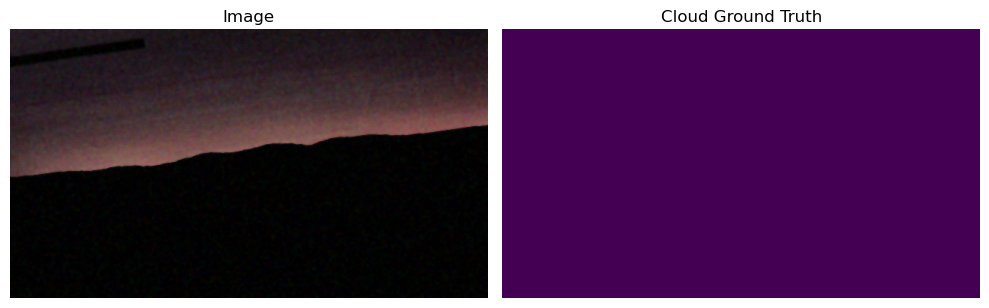

In [28]:
def unnormalize(
    image,
    mean=(0.485, 0.456, 0.406),
    std=(0.229, 0.224, 0.225),
):
    image = image.copy()
    image = image * std + mean
    image = image.clip(0, 1)
    return image

batch = next(it)
image = batch[0][0]
ground_truth = batch[1][0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(unnormalize(image.numpy().transpose(1, 2, 0)))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Cloud Ground Truth")
plt.imshow(ground_truth.numpy().transpose(1, 2, 0), vmin=0, vmax=1)
plt.axis("off")
plt.tight_layout()
plt.show()